# SMS Spam Detection

In [1]:
#importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# importing the dataset.
df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
dataset = pd.DataFrame(df)


In [7]:
dataset.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [8]:
# renaming the first two columns as target and text.
dataset.rename(columns = {'v1':'target', 'v2': 'text'}, inplace = True)

In [9]:
dataset.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# Deploy

# 1. Data Cleaning

In [11]:
dataset.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
# since last 3 columns are missing most of the vlaues, better to drop them
dataset.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace =True)

In [13]:
dataset.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# converting ham and spam to numericals values using label encoding.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
# Encode labels in column 'target'.
dataset['target']= le.fit_transform(dataset['target'])

In [16]:
dataset.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# checking for missing values.
dataset.isnull().sum() # no missing vlaues.

target    0
text      0
dtype: int64

In [18]:
# checking duplicates.
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [19]:
# since 403 rows are duplicates, so we must get rid of them.
dataset = dataset.drop_duplicates(keep = 'first')

In [20]:
dataset.duplicated().sum()

0

# EDA

In [21]:
dataset.sample(5)

,target,text
1801,0,I wanna watch that movie
2263,1,Not heard from U4 a while. Call 4 rude chat pr...
2279,0,"Sorry, I'll call later in meeting"
1305,0,Designation is software developer and may be s...
2425,0,Hey!!! I almost forgot ... Happy B-day babe ! ...


In [22]:
# checking the % of ham and spam in dataset.
print('ham: ', len(dataset[dataset['target'] == 0])/len(dataset)*100)
print('spam: ', len(dataset[dataset['target'] == 1])/len(dataset)*100)

ham:  87.3669955503966
spam:  12.633004449603405


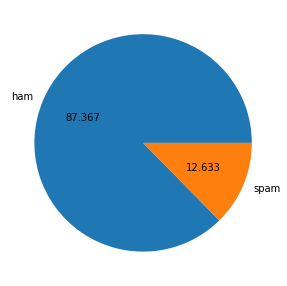

In [23]:
# visualizing the pie-plot of the ham and spam dataset
plt.figure(figsize=(14,5))
plt.pie(dataset['target'].value_counts(), labels = ['ham','spam'],autopct = "%0.3f")
plt.show()

In [24]:
# we see that most of the sms are ham, and only 12% are spam ---> data is not properly collected(is imbalance)
# data is imbalance

In [25]:
# now we will see the number of words, sentences and characters in the dataset.


In [26]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
# finding the length of each text.
dataset['num_characters'] = dataset['text'].apply(len)

In [30]:
dataset.head(2)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [31]:
# counting the words.
dataset['num_words'] = dataset['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
dataset.head(3)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [33]:
# tokenizing on the basis of sentences.
dataset['num_sentences'] = dataset['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
dataset.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
# now checking the statistical relation of newly added numerica columns.
dataset[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# let's analyse the ham and spam separately.
#  ham
dataset[dataset['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# spam- statistical analysis.
dataset[dataset['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
# we see that the mean words of spam is greater than the ham --> more words in spam sms.
# spam messages are longer; 

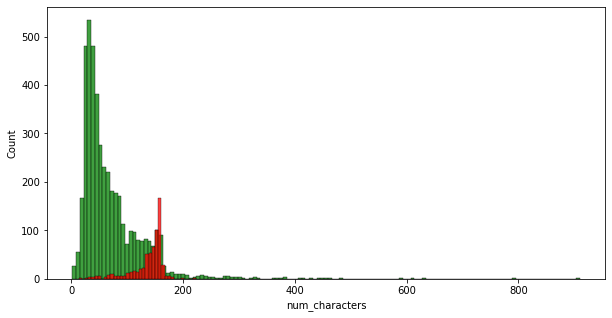

In [39]:
# let's plot the two messages || On num of characters
plt.figure(figsize =(10,5))
sn.histplot(dataset[dataset['target']==0]['num_characters'],color='green')
sn.histplot(dataset[dataset['target']==1]['num_characters'],color='red')
plt.show()

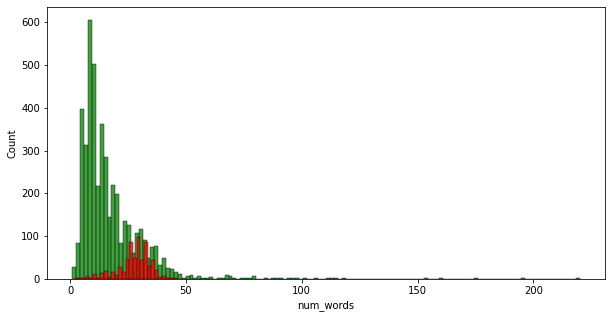

In [40]:
# let's plot the two messages || On num of words.
plt.figure(figsize =(10,5))
sn.histplot(dataset[dataset['target']==0]['num_words'],color='green')
sn.histplot(dataset[dataset['target']==1]['num_words'],color='red')
plt.show()

In [41]:
# we can clearly see that the number of charcters or the words is more for the spam messages.

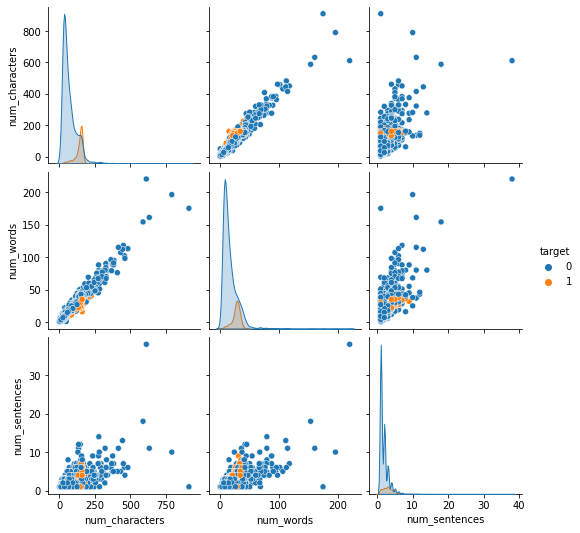

In [42]:
# let's see the pair plot
sn.pairplot(dataset,hue='target')
plt.show()

In [43]:
# we see that there are some outliers in the data

<AxesSubplot:>

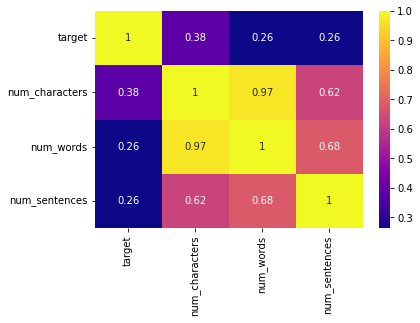

In [44]:
# let's find the correlations 
sn.heatmap(dataset.corr(),annot=True,cmap='plasma')

In [45]:
# we can see that there is very high correlation between these different numerical features.
#0.97 b/w num_characters and num_words.
# 0.68 --> num_words vs num_sentences.
# so there is multicollinearity in the dataset: so we should eliminte some of the columns.

# Data: Text Preprocessing

1. Lower case
2. Tokenization
3. Removing special Characters
4. Removing stop words and punctuation
5. Stemming

In [46]:
# Lower case.
def transform_lower(text):
    text = text.lower()
    return text
    

In [47]:
transform_lower('WElkome inDiaAA')

'welkome indiaaa'

In [48]:
# tokenization: separating the words.
def tokenize_words(text):
    text = nltk.word_tokenize(text)
    return text

In [49]:
tokenize_words("HI how are you my friend??@##")

['HI', 'how', 'are', 'you', 'my', 'friend', '?', '?', '@', '#', '#']

In [50]:
# alphanumeric check.
y=[]
def alphanumeric_(text):
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [51]:
alphanumeric_('hi how are you my %% ## @*#(@)')

['h', 'i', 'h', 'o', 'w', 'a', 'r', 'e', 'y', 'o', 'u', 'm', 'y']

In [52]:
# removing stop words and punctuations.

In [53]:
# Download the stopwords resource
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
# punctuations.
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
# stemming:  removing the 'ing', 'ed' : bringing to root form.
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('practicing')

'practic'

In [56]:
# finally integrating all these processing methods to transform the text column

In [57]:
def transform_text(text):
    text = text.lower()  # -- to lower
    text = nltk.word_tokenize(text) #-- to words.
    
    y =[]
    for i in text: # -- removing non-alpha-numeric.
        if i.isalnum():
            y.append(i)
    
    # text = y ---> is wrong
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y) # -- in the form of string.
            
    
    

In [58]:
transform_text('Hi how are you raushan>>@#@ lkf3o catcing')

'hi raushan lkf3o catc'

In [59]:
# creating a new column of those processed data on text.
dataset['transformed_text'] = dataset['text'].apply(transform_text)

In [60]:
len(dataset['transformed_text'][524])

69

# Word Cloud

In [61]:
# it will display the top words in the dataset.


In [62]:
#from wordcloud import WordCloud


In [63]:
#wc = WordCloud(width=50,height=50,min_font_size=10,background_color='white')

In [64]:
# Generate the word cloud
#spam_wc = wc.generate(dataset[dataset['target'] == 0]['transformed_text'].str.cat(sep=" "))


In [65]:
# spam word cloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(dataset[dataset['target']==1]['transformed_text'].str.cat(sep=" "))

In [66]:
#printing the top 30 words.

In [67]:
spam_corpus=[]
for msg in dataset[dataset['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [68]:
len(spam_corpus)

9939

In [69]:
# so there are around 10k words in the spam messsages.

In [70]:
# printing the top 30 messages in spam messages list.
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


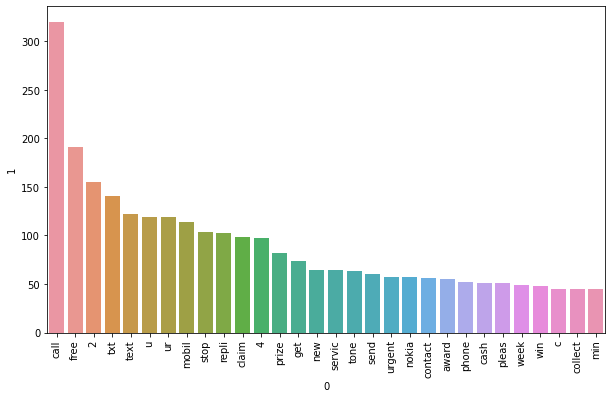

In [71]:
# visualizing these data-points.
plt.figure(figsize=(10,6))
x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] # x-labels
y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1] # y-counts.
sn.barplot(x,y)
plt.xticks(rotation='vertical')
plt.show()

In [72]:
# for ham messages.

In [73]:
ham_corpus=[]
for msg in dataset[dataset['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [74]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


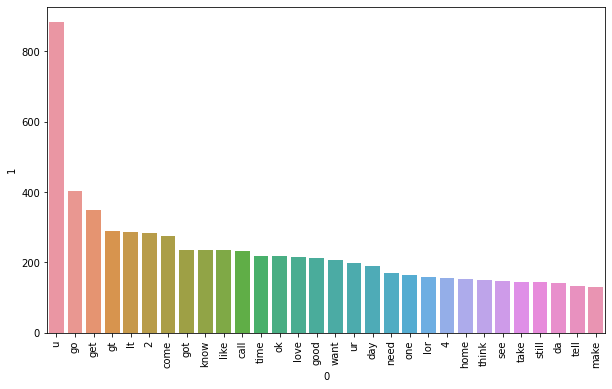

In [75]:
# visualizing the ham-words.
plt.figure(figsize=(10,6))
x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0] # words(x)
y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1] # counts(y)
sn.barplot(x,y)
plt.xticks(rotation='vertical')
plt.show()

# model building

In [76]:
# we will use NaiveBayes algo, since there is general conception that these models
# peform well with textual data.

In [77]:
# will use bag-of-words,tfid.


In [78]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [79]:
x = tfidf.fit_transform(dataset['transformed_text']).toarray()

In [80]:
x.shape

(5169, 6708)

In [81]:
# so we have 5169 messages and 6708 words in them.

In [82]:
y = dataset['target'].values

In [83]:
y.shape # 5169 for each message in x ==> one output.

(5169,)

# Train Test split

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [85]:
x_train.shape, x_test.shape

((4135, 6708), (1034, 6708))

# Naive Bayes Algorithms

In [86]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [87]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [88]:
# Gaussian Naive Bayes model fitting.
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [170]:
# Multinomial Naive Bayes model fitting.
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [90]:
# false positive[in actual its not spam: but it was predicted as spam] = 0--> 
#here we see that it is not giving any false positve: precision score = 1.0.
# earlier with the CountVectorizer its precision score was less.

In [91]:
# Bernoulli Naive Bayes model fitting
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [92]:
# Bernoulli NB although has good accuracy and precision, but since accuracy is not a reliable
# term.. since the data is imbalance, we would go to model w  ith higher precision score.

In [93]:
# tfid ---> MNB (is better above)

# Classification Model algorithms

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [95]:
# object for each of the  models.
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [96]:
# a dictionary of all the models and model name
clfs = {
    'SVC': svc,
    'kN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [97]:
# function to calculate the accuracy and precision score of the models.
def train_classifier(clf, x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [98]:
# support vector classifier.
train_classifier(svc, x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [105]:
# now printing the accuracy and precision score of all the models.
results=[]
def train_classifier(clf, x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision
    

In [106]:
# looping onto the dictionray of models( clfs)
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    acc, prec = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ", name)
    print("Accuracy - ", acc)
    print("Precision- ", prec)
    accuracy_scores.append(acc)
    precision_scores.append(prec)

For  SVC
Accuracy -  0.9729206963249516
Precision-  0.9741379310344828
For  kN
Accuracy -  0.9003868471953579
Precision-  1.0
For  NB
Accuracy -  0.9593810444874274
Precision-  1.0
For  DT
Accuracy -  0.9361702127659575
Precision-  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision-  0.94
For  RF
Accuracy -  0.971953578336557
Precision-  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision-  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision-  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision-  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision-  0.9238095238095239
For  xgb
Accuracy -  0.9700193423597679
Precision-  0.9349593495934959


In [112]:
# converting them to dataframe.
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores,'Precision': precision_scores})

In [114]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,kN,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.936170,0.846154
4,LR,0.951644,0.940000
5,RF,0.971954,1.000000
6,AdaBoost,0.961315,0.945455
7,BgC,0.958414,0.862595
8,ETC,0.972921,0.982456
9,GBDT,0.952611,0.923810


In [116]:
# sorting performance_df based on precision
performance_df.sort_values('Precision',ascending=False)

,Algorithm,Accuracy,Precision
1,kN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.970019,0.934959
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [120]:
# model improvement
# while we were using tfid vectoriser, we didn't take the parameter max_features, which the maximum number of words we want to take to vectorise.
# we can take 1000 most used words from the corpus..
# then store all the newly calculated stats in new performance df and finally append to the original preformance df.

In [165]:
# there were around 6000 words originally  and by default it was vectorizing all of them.
# now we will restrict it to vectorize only top 3000 words.
tfidf = TfidfVectorizer(max_features=3000)

In [166]:
x = tfidf.fit_transform(dataset['transformed_text']).toarray()

In [167]:
x.shape # shape reduced to 3000 now.

(5169, 3000)

In [168]:
y = dataset['target'].values

In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [126]:
# again fitting all the models on changed tfid vectorizer

In [127]:
# now printing the accuracy and precision score of all the models.
def train_classifier(clf, x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    
    curr_accuracy = accuracy_score(y_test,y_pred)
    curr_precision = precision_score(y_test,y_pred)
    
    return curr_accuracy, curr_precision


In [128]:
# looping onto the dictionray of models( clfs)
_3000_accuracy_scores = []
_3000_precision_scores = []

for name, clf in clfs.items():
    acc, prec = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ", name)
    print("Accuracy - ", acc)
    print("Precision- ", prec)
    _3000_accuracy_scores.append(acc)
    _3000_precision_scores.append(prec)

For  SVC
Accuracy -  0.9758220502901354
Precision-  0.9747899159663865
For  kN
Accuracy -  0.9052224371373307
Precision-  1.0
For  NB
Accuracy -  0.9709864603481625
Precision-  1.0
For  DT
Accuracy -  0.9323017408123792
Precision-  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision-  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision-  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision-  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision-  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision-  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision-  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision-  0.9333333333333333


In [132]:
# converting them to dataframe.
performance_3000 = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_3000': _3000_accuracy_scores,'Precision_3000': _3000_precision_scores})

In [133]:
# finally merging new result with the old performance_df on 'Algorithm':(since it is common column to both.)
performance_df.merge(performance_3000, on ='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
0,SVC,0.972921,0.974138,0.975822,0.974790
1,kN,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
3,DT,0.936170,0.846154,0.932302,0.833333
4,LR,0.951644,0.940000,0.958414,0.970297
5,RF,0.971954,1.000000,0.975822,0.982906
6,AdaBoost,0.961315,0.945455,0.960348,0.929204
7,BgC,0.958414,0.862595,0.958414,0.868217
8,ETC,0.972921,0.982456,0.974855,0.974576
9,GBDT,0.952611,0.923810,0.946809,0.919192


# Observation

We see that the  precision of NB is still 1.00 and its accuracy has also increased.
Earlier RF was performing better than NB, but on 3000 vectorization, its precision reduced.
So it is good to select NB.

1. since, ti-idf not only counts the fequency of a word but it also normalize it to the scale of [0-1]
2. so applying min max scaler or standard scaler again on it won't affect the result too..

In [145]:
# Now appending the num_character columns to the x-data.

In [144]:
x = np.hstack((x,dataset['num_characters'].values.reshape(-1,1)))

In [146]:
x.shape
# on adding new columns,we can see that the total features become 3001, 
# ie. now we have 3001 columns, 3000 from vectorizer and 1 of num_characters.

(5169, 3001)

In [149]:
# now we will train the model again and get the accuracy and precision 
# then compare these stats with the previous accuracy and precision.

In [150]:
# let's make voting classifer to check if it out-perform the NB on precision and accuracy.

# voting classifier

 On Best performing models

In [152]:
svc = SVC(kernel ='sigmoid',gamma=0.1,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [153]:
# it is type of ensemble model (average based model)
from sklearn.ensemble import VotingClassifier

In [154]:
voting = VotingClassifier(estimators = [('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [155]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=0.1, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [156]:
y_predicted = voting.predict(x_test)
print('accuracy', accuracy_score(y_test,y_predicted))
print('precision',precision_score(y_test,y_predicted))

accuracy 0.97678916827853
precision 0.9830508474576272


In [157]:
# althought the accuracy increased but the precision is not good (earlier it was 1.00)

# Stacking

In [158]:
# in stacking we use same voting method but provide a weightage relative a particular model.

In [160]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [161]:
from sklearn.ensemble import StackingClassifier

In [162]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [163]:
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
print('accuracy', accuracy_score(y_test,y_predicted))
print('precision', precision_score(y_test,y_predicted))

accuracy 0.9796905222437138
precision 0.9465648854961832


In [164]:
# we see that precision decreased much.
# so better to take the intial Naive Bayes model.(multinomial)

# Ready for pkl files

## steps to perform when a new email comes.

1. Preprocess the message using transform_text function(above) which gave a new text removing all unneccessary parts.
2. Vectorize the text (tfidf vectorizer)
3. Algorithm application

In [171]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))